# 직교 행렬과 QR 분해
## 1. 직교 행렬
직교행렬은 QR분해, 고윳값 분해, 특잇값 분해등 여러가지 분해에 필수적인 특수 행렬이다.
문자 Q는 종종 직교행렬을 나타내는 데 사용된다. 직교 행렬은 두가지 속성을 가진다.
### 직교열
    - 행렬의 모든 열은 서로 직교한다.
### 단위노름 열
    - 각 열의 노름은 정확히 1이다.
모든 열은 자기 자신과의 내적은 1이지만 다른 열과의 내적은 0이다.

직교행렬 Q는 아래 조건을 만족한다.
$$ Q^T Q = I $$

In [2]:
import numpy as np
Q1 = np.array([[1,-1],[1,1]]) / np.sqrt(2)
Q2 = np.array([[1,2,2],[2,1,-2],[-2,2,-1]]) / 3
print(Q1.T @ Q1)
print(Q1 @ Q1.T)

print(Q2.T @ Q2)
print(Q2 @ Q2.T)


[[1.00000000e+00 2.23711432e-17]
 [2.23711432e-17 1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
[[1.00000000e+00 2.46716228e-17 1.54197642e-17]
 [2.46716228e-17 1.00000000e+00 1.23358114e-17]
 [1.54197642e-17 1.23358114e-17 1.00000000e+00]]
[[ 1.00000000e+00  2.46716228e-17 -1.54197642e-17]
 [ 2.46716228e-17  1.00000000e+00 -1.23358114e-17]
 [-1.54197642e-17 -1.23358114e-17  1.00000000e+00]]


순수 회전 행렬도 직교행렬이다.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

origin = np.array([[0,0],[0,0]])
theta = np.radians(45)
Q1 = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])

print(Q1.T @ Q1)

[[1.00000000e+00 4.26642159e-17]
 [4.26642159e-17 1.00000000e+00]]


## QR 분해로 직교행렬 만들기

In [14]:
import numpy as np

#랜덤 행렬 생성
A = np.random.randn(4,4)
print(A)
#QR 분해
Q, R = np.linalg.qr(A)

print("직교 행렬 Q:")
print(Q)

v = np.array([1,2,3,4])
print(np.linalg.norm(v))
resultVect = Q.dot(v)
print(np.linalg.norm(resultVect))




[[ 0.9135191  -0.62088616  1.78549761 -0.26709033]
 [-0.96791307 -1.23196298 -0.10389493  0.47801722]
 [ 0.16112557 -1.52347584  0.57286363 -0.86788466]
 [-0.79681707  0.33585061 -0.57639999  0.77896937]]
직교 행렬 Q:
[[-0.58575145 -0.31855556  0.7443685   0.03651205]
 [ 0.62062904 -0.57047319  0.26714605 -0.46691855]
 [-0.10331424 -0.7355506  -0.42159457  0.52014373]
 [ 0.51092172  0.17901958  0.44362883  0.71421596]]
5.477225575051661
5.47722557505166


## Scipy 로 생성

In [8]:
from scipy.stats import ortho_group

Q = ortho_group.rvs(dim=4)

print(Q)
print(Q.T @ Q)

[[ 0.22120686  0.67508467  0.64660777 -0.27789675]
 [-0.54322607  0.62671544 -0.53608471 -0.1573098 ]
 [ 0.57054597 -0.0534643  -0.43725669 -0.6931273 ]
 [-0.57484803 -0.38552562  0.32143143 -0.64622099]]
[[ 1.00000000e+00  6.93889390e-17  2.49800181e-16  0.00000000e+00]
 [ 6.93889390e-17  1.00000000e+00  1.11022302e-16  5.55111512e-17]
 [ 2.49800181e-16  1.11022302e-16  1.00000000e+00 -1.38777878e-16]
 [ 0.00000000e+00  5.55111512e-17 -1.38777878e-16  1.00000000e+00]]


## QR 분해를 이용하여 $ Ax = b $ 를 구하기

In [23]:
A = np.array([[2.0,1.0],[1.0,3.0]])
B = np.array([1.0,2.0])

Q, R = np.linalg.qr(A)

print("Q =\n", Q)
print("R =\n", R)

Q =
 [[-0.89442719 -0.4472136 ]
 [-0.4472136   0.89442719]]
R =
 [[-2.23606798 -2.23606798]
 [ 0.          2.23606798]]


$ Ax = b => QRx = b =>Rx = Q^Tb $

In [27]:
Qt_b = Q.T @ B
print(Qt_b)

[-1.78885438  1.34164079]


In [29]:
x = np.linalg.solve(R,Qt_b)
print(x)

[0.2 0.6]


## 최소제곱법을 QR분해를 이용하여 풀기

In [32]:
#  과잉 방정식 : 3개 식, 2개 변수
A = np.array([[1,1],[1,2],[1,3]])
b = np.array([1,2,2])

# QR 분해
Q,R = np.linalg.qr(A)

#최소제곱해
x = np.linalg.solve(R,Q.T@b)
print(x)

[0.66666667 0.5       ]


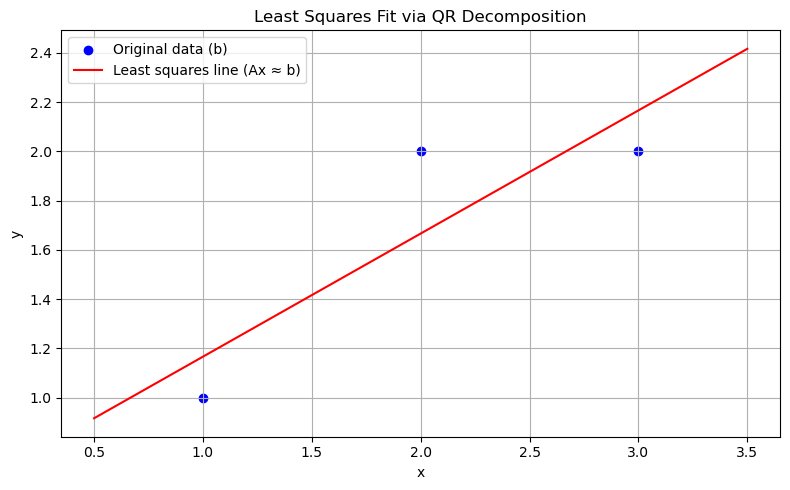

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 원래 데이터 (과잉방정식)
x_data = np.array([1, 2, 3])
y_data = np.array([1, 2, 2])

# 디자인 행렬 A (1차 다항: 절편 + 기울기)
A = np.vstack([np.ones_like(x_data), x_data]).T  # shape (3, 2)

# QR 분해
Q, R = np.linalg.qr(A)
x_ls = np.linalg.solve(R, Q.T @ y_data)  # 최소제곱 해

# 예측값 계산
x_fit = np.linspace(0.5, 3.5, 100)
y_fit = x_ls[0] + x_ls[1] * x_fit

# 시각화
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, color='blue', label='Original data (b)')
plt.plot(x_fit, y_fit, color='red', label='Least squares line (Ax ≈ b)')
plt.title('Least Squares Fit via QR Decomposition')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1744380012.py:29: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1744380012.py:29: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1744380012.py:29: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1744380012.py:29: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1744380012.py:29: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1744380012.py:29: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing fr

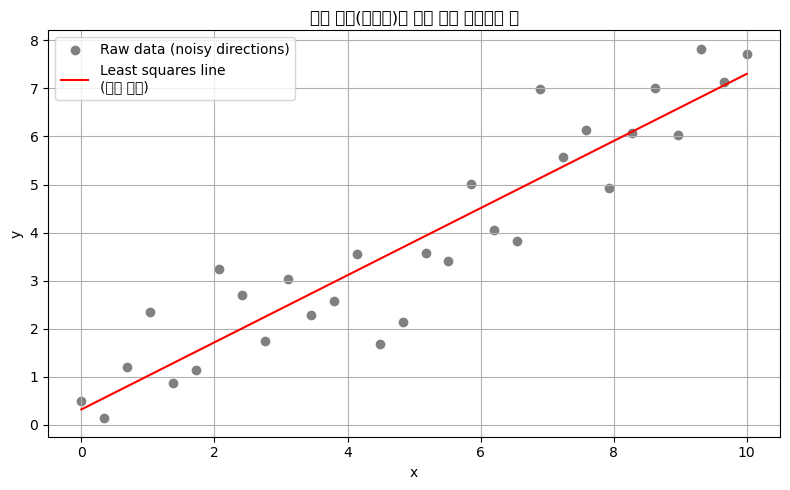

In [36]:
# 예제를 위한 랜덤한 "각도가 섞인" 점들 생성
np.random.seed(42)
n = 30
x_data = np.linspace(0, 10, n)
true_slope = 0.8
noise = np.random.normal(0, 1.0, n)
y_data = true_slope * x_data + noise  # 섞인 각도: y = 0.8x + noise

# 디자인 행렬 A (1차 회귀: 절편 + 기울기)
A = np.vstack([np.ones_like(x_data), x_data]).T

# QR 분해로 최소제곱 해
Q, R = np.linalg.qr(A)
x_ls = np.linalg.solve(R, Q.T @ y_data)  # 최소제곱 해 (절편, 기울기)

# 대표 직선 그리기
x_fit = np.linspace(0, 10, 100)
y_fit = x_ls[0] + x_ls[1] * x_fit

# 시각화
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, color='gray', label='Raw data (noisy directions)')
plt.plot(x_fit, y_fit, color='red', label='Least squares line\n(대표 방향)')
plt.title('대표 방향(기울기)을 찾기 위한 최소제곱 해')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[[1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]]
[37.5  0.1]
[1.269e+02 5.000e-02]


C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1001869492.py:42: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1001869492.py:42: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1001869492.py:42: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1001869492.py:42: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1001869492.py:42: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\egkim\AppData\Local\Temp\ipykernel_10972\1001869492.py:42: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing fr

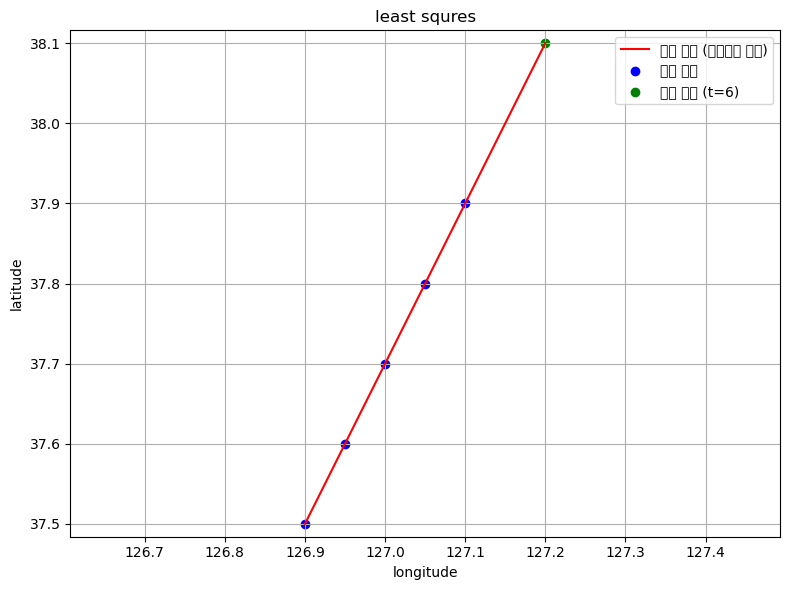

In [45]:
# 시간, 위도, 경도 예제 데이터
t = np.array([0, 1, 2, 3, 4])
lat = np.array([37.5, 37.6, 37.7, 37.8, 37.9])
lon = np.array([126.9, 126.95, 127.0, 127.05, 127.1])

# 디자인 행렬 (1차 회귀)
A = np.vstack([np.ones_like(t), t]).T

print(A)

# QR 분해로 위도 회귀
Q1, R1 = np.linalg.qr(A)
lat_coef = np.linalg.solve(R1, Q1.T @ lat)
print(lat_coef)

# QR 분해로 경도 회귀
Q2, R2 = np.linalg.qr(A)
lon_coef = np.linalg.solve(R2, Q2.T @ lon)
print(lon_coef)

# 예측용 시간 범위
t_fit = np.linspace(0, 6, 100)
lat_fit = lat_coef[0] + lat_coef[1] * t_fit
lon_fit = lon_coef[0] + lon_coef[1] * t_fit

# 예측 지점
t_predict = 6
lat_pred = lat_coef[0] + lat_coef[1] * t_predict
lon_pred = lon_coef[0] + lon_coef[1] * t_predict

# 시각화
plt.figure(figsize=(8, 6))
plt.plot(lon_fit, lat_fit, label='예측 경로 (최소제곱 직선)', color='red')
plt.scatter(lon, lat, label='관측 위치', color='blue')
plt.scatter(lon_pred, lat_pred, color='green', label=f'예측 위치 (t=6)')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('least squres')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()
